# **Predictive Analytics: Pendidikan**
- **Nama:** Muhammad Azhar Fikri
- **Email:** muhammadazharfikri990@gmail.com
- **ID Dicoding:** ririee


# **1. Import Library**

Pada tahap ini, mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
import zipfile
import textwrap
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler

from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier, MultiOutputRegressor
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier, XGBRegressor

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score,  mean_squared_error, mean_absolute_error, r2_score

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

from google.colab import drive
from google.colab import files

# **2. Data Loading**

Memuat dataset dari Kaggle yakni Dataset `students-performance-in-exams` yang diupload oleh **Jakki Seshapanpu**.

In [2]:
files.upload()

!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle (4).json
mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [3]:
!kaggle datasets download -d spscientist/students-performance-in-exams

Dataset URL: https://www.kaggle.com/datasets/spscientist/students-performance-in-exams
License(s): unknown
students-performance-in-exams.zip: Skipping, found more recently modified local copy (use --force to force download)


Selanjutnya, mengekstrak file zip.

In [4]:
zip_ref = zipfile.ZipFile('/content/students-performance-in-exams.zip', 'r')
zip_ref.extractall('/content/')
zip_ref.close()

Dataset format `.csv` disimpan pada variabel dataframe `df_score`

In [5]:
df_score = pd.read_csv('/content/StudentsPerformance.csv')

Dataset ini memiliki 5 fitur **kategorikal**, yaitu `gender`, `race/ethnicity`, `parental level of education`, `lunch`, dan `test preparation course`. Selain itu, terdapat 3 fitur **numerik** yang terdiri dari nilai `math score`, `reading score`, dan `writing score`.

In [6]:
df_score.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [7]:
print(df_score.shape)

(1000, 8)


Dari `.shape` diatas terdapat 1.000 baris dan 8 kolom pada dataset.

# **3. Exploratory Data Analysis (EDA)**

**Exploratory Data Analysis (EDA)** adalah pendekatan untuk menganalisis dan memahami data sebelum melakukan model prediksi. Tujuan utamanya adalah untuk mendapatkan wawasan awal dari data, seperti pola yang muncul, hubungan antar variabel, serta mendeteksi masalah kualitas data seperti nilai hilang atau outlier.

In [8]:
df_score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


Dari `.info` terlihat bahwa dataset ini terdapat 8 kolom. Diantaranya:
* `gender` : jenis kelamin siswa, terdiri dari `male` dan `female`.
* `race/ethnicity` : ras / etnis siswa, dikategorikan dari `group A` hingga `group E`.
* `parental level of education` : jenjang pendidikan tertinggi yang dicapai oleh orang tua siswa.
* `lunch` : jenis makan siang yang diterima siswa, `standard` atau `free/reduced`.
* `test preparation course` : status keikutsertaan siswa dalam program persiapan ujian, `completed` atau `none`.
* `math score` : nilai ujian matematika dengan rentang `0–100`.
* `reading score` : nilai ujian membaca dengan rentang `0–100`.
* `writing score` : nilai ujian menulis dengan rentang `0–100`.







Melihat apakah terdapat data *null* atau kosong menggunakan `.isnull().sum()`.

In [9]:
print(df_score.isnull().sum())

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


Melihat apakah terdapat duplikasi data menggunakan `.duplicated().sum()`.

In [10]:
print(df_score.duplicated().sum())

0


In [11]:
df_score.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Fungsi `.describe()` memberikan informasi statistik, antara lain:

* `count`: jumlah data pada kolom.
* `mean`: nilai rata-rata dari kolom.
* `std`: standar deviasi, mengukur sebaran data di sekitar nilai rata-rata.
* `min`: nilai terkecil dalam kolom.
* `25%`: Q1, nilai yang menandai batas bawah dari 25% data pertama.
* `50%`: Q2 atau biasa disebut **median**, yaitu nilai tengah yang membagi data menjadi dua bagian yang sama.
* `75%`: Q3, yaitu nilai yang menandai batas atas dari 75% data pertama.
* `max`: nilai terbesar dalam kolom.

Melihat apakah terdapat outlier pada fitur **numerikal**.

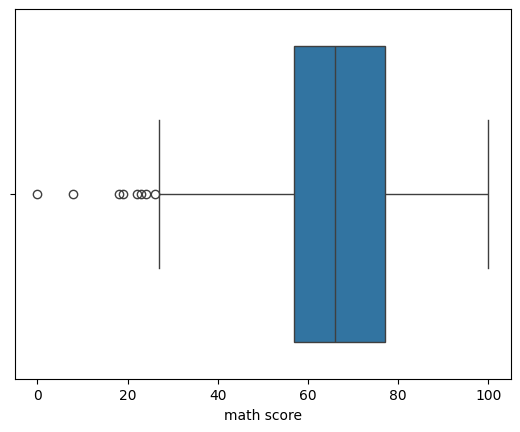

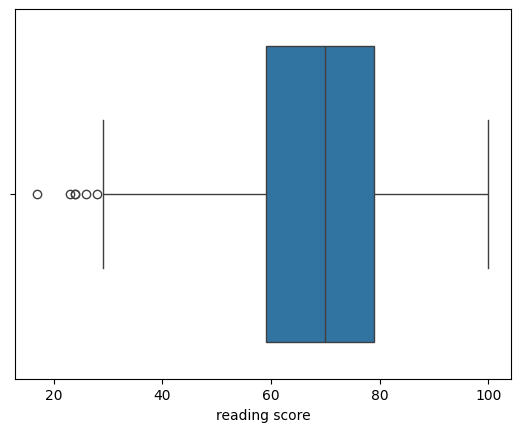

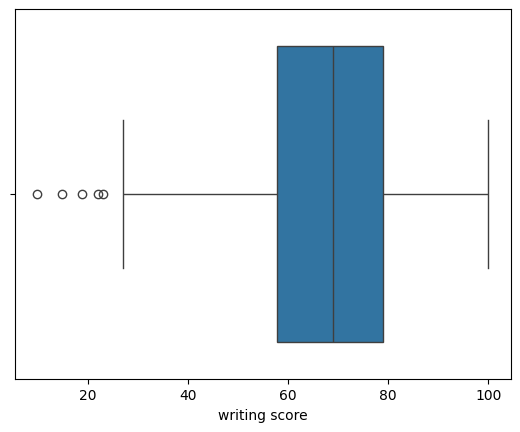

In [12]:
df_outlier = df_score.select_dtypes(exclude=['object'])

for column in df_outlier:
        plt.figure()
        sns.boxplot(data=df_outlier, x=column)

In [13]:
numerik_cols = df_score.select_dtypes(include=['int64', 'float64']).columns

Q1 = df_score[numerik_cols].quantile(0.25)
Q3 = df_score[numerik_cols].quantile(0.75)
IQR = Q3 - Q1

df_score = df_score[~((df_score[numerik_cols] < (Q1 - 1.5 * IQR)) |
                      (df_score[numerik_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [14]:
df_score.shape

(988, 8)

Dari `.shape` diatas terdapat 12 data outlier pada dataset.

Univariate Analysis - fitur `numerikal`.

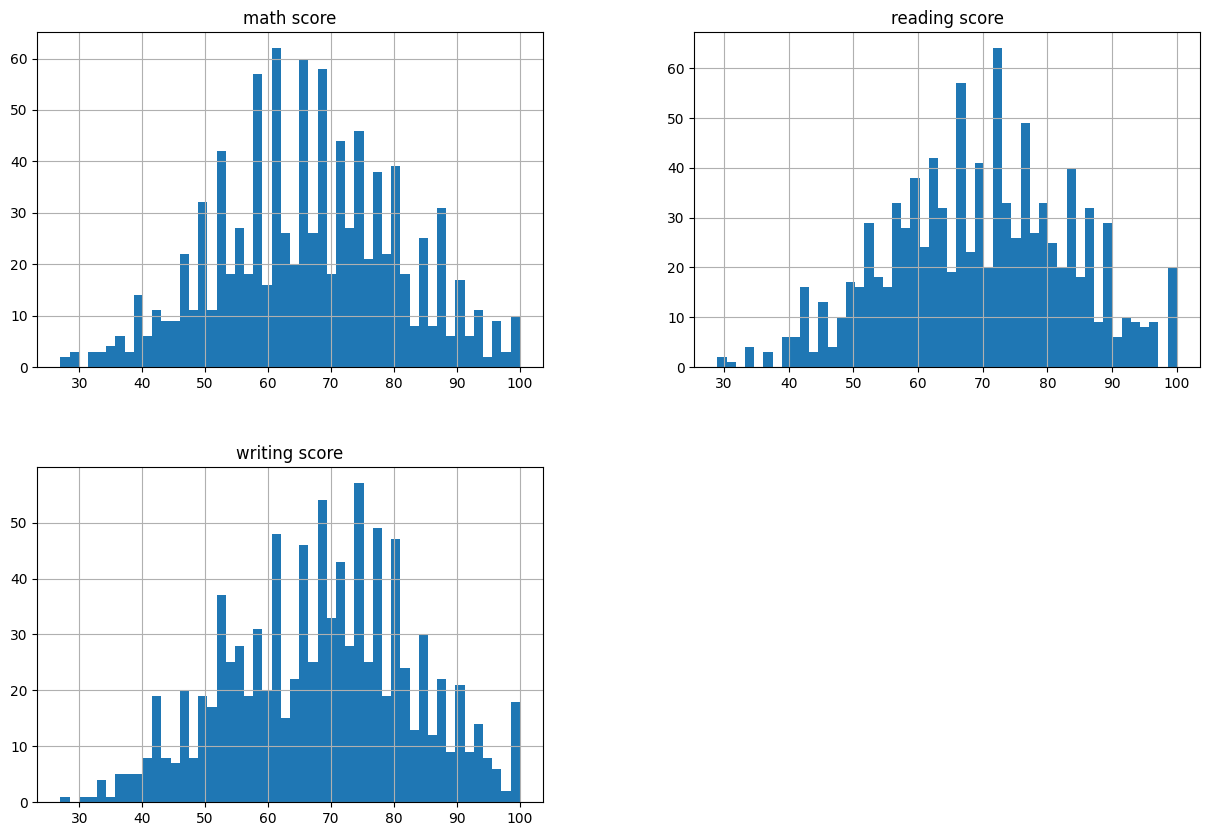

In [15]:
df_score.hist(bins=50, figsize=(15, 10))
plt.show()

Multivariate Analysis - fitur `numerikal`.

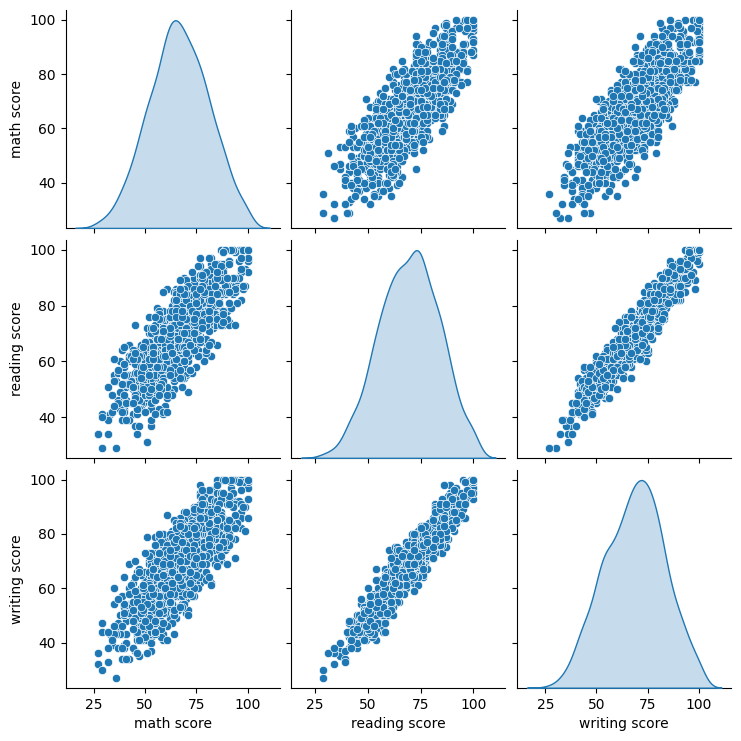

In [16]:
sns.pairplot(df_score, diag_kind = 'kde')
plt.show()

Korelasi fitur `numerikal`

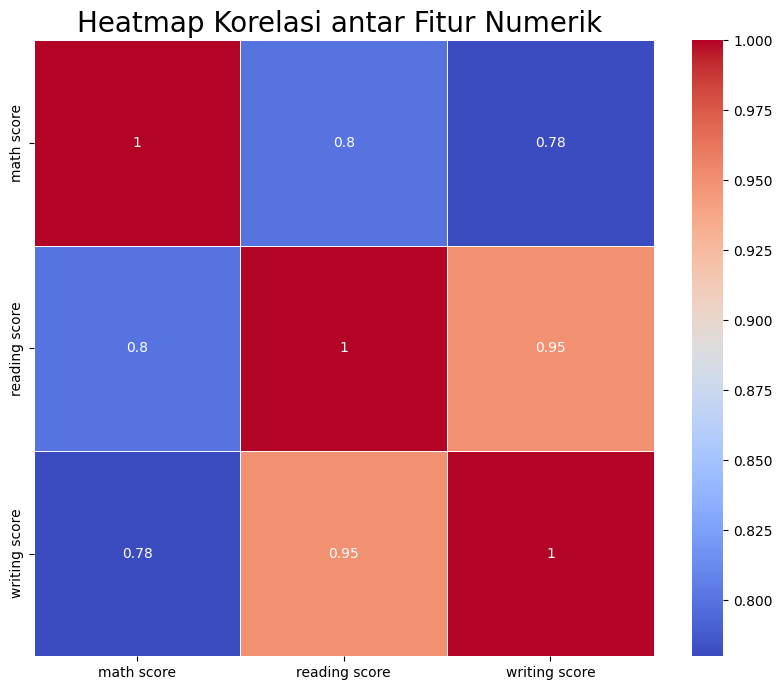

In [17]:
plt.figure(figsize=(10, 8))
correlation_matrix = df_score[numerik_cols].corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)


plt.title("Heatmap Korelasi antar Fitur Numerik ", size=20)
plt.show()

Melihat persebaran data pada fitur **kategorikal**.

In [18]:
kategorikal_cols = [
    'gender',
    'race/ethnicity',
    'parental level of education',
    'lunch',
    'test preparation course'
]

In [19]:
for col in kategorikal_cols:
    print(f"\nNilai unik pada kolom '{col}':")
    print(df_score[col].unique())
    print(df_score[col].value_counts())
    print("\n" + "-"*50)


Nilai unik pada kolom 'gender':
['female' 'male']
gender
female    510
male      478
Name: count, dtype: int64

--------------------------------------------------

Nilai unik pada kolom 'race/ethnicity':
['group B' 'group C' 'group A' 'group D' 'group E']
race/ethnicity
group C    316
group D    261
group B    184
group E    139
group A     88
Name: count, dtype: int64

--------------------------------------------------

Nilai unik pada kolom 'parental level of education':
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
parental level of education
some college          222
associate's degree    221
high school           193
some high school      175
bachelor's degree     118
master's degree        59
Name: count, dtype: int64

--------------------------------------------------

Nilai unik pada kolom 'lunch':
['standard' 'free/reduced']
lunch
standard        643
free/reduced    345
Name: count, dtype: int64

----------------

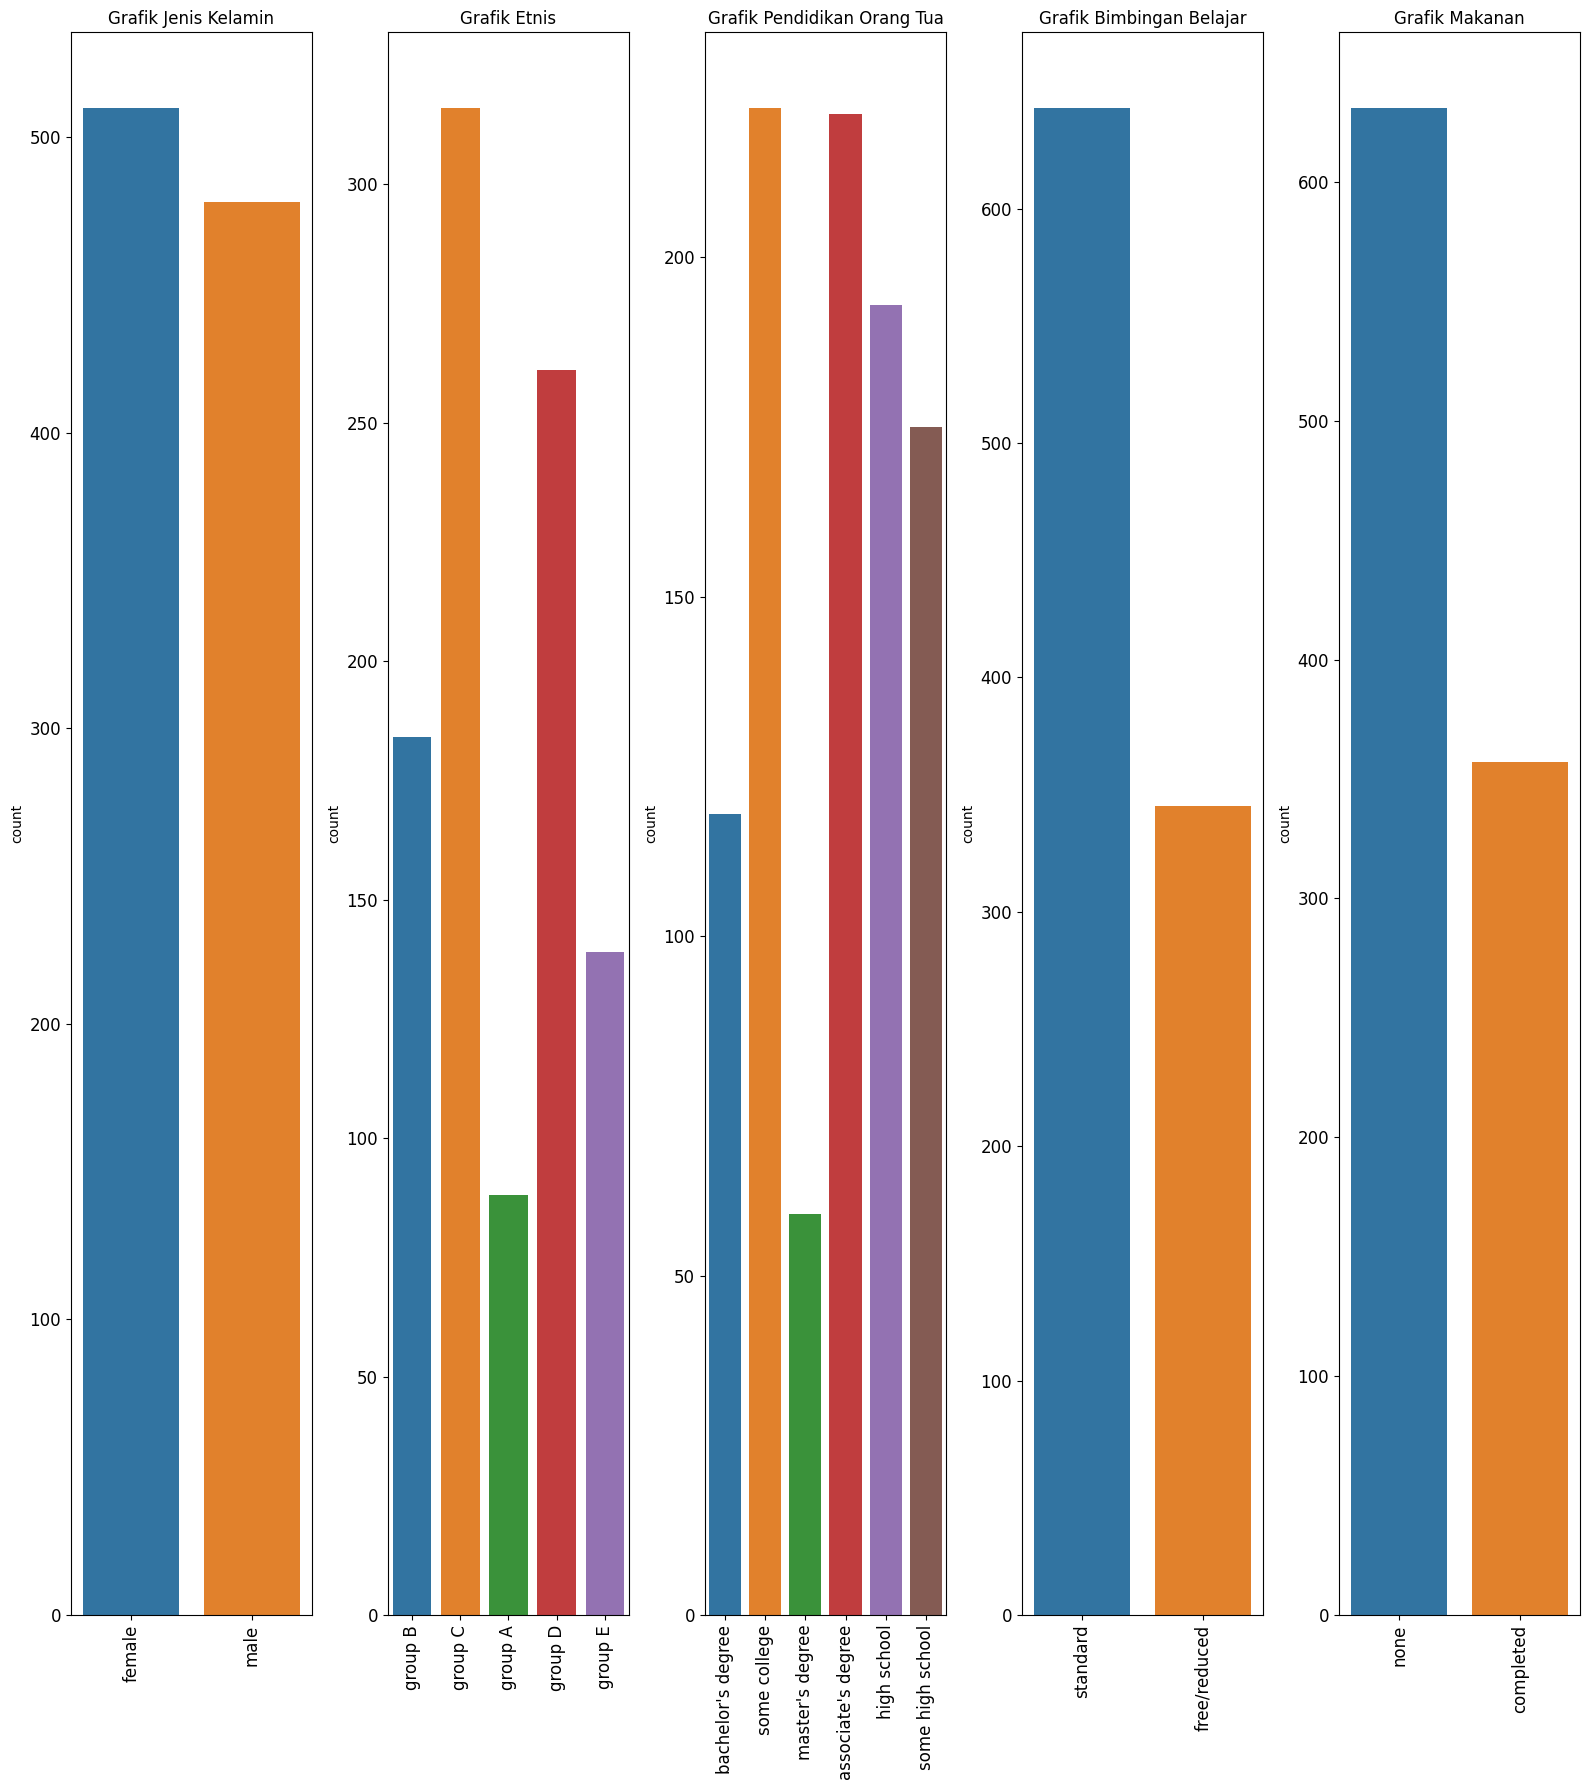

In [20]:
fig, axes = plt.subplots(1, 5, figsize=(16, 18))
axes = axes.flatten()

keterangan_kolom_kategorikal = [
    "Jenis Kelamin",
    "Etnis",
    "Pendidikan Orang Tua",
    "Bimbingan Belajar",
    "Makanan",
    "Persiapan Ujian"
]

for i, kolom in enumerate(kategorikal_cols):
    unique_values = df_score[kolom].nunique()
    sns.countplot(x=kolom, data=df_score, ax=axes[i], hue=kolom)

    judul = "\n".join(textwrap.wrap(f"Grafik {keterangan_kolom_kategorikal[i]}", width=50))
    axes[i].set_title(judul)
    axes[i].title.set_size(12)

    axes[i].tick_params(axis="x", labelrotation=90)
    axes[i].tick_params(axis="both", which="major", labelsize=12)
    axes[i].set_xlabel("")

plt.tight_layout()
plt.show()

1. Apakah terdapat perbedaan performa akademik antara siswa laki-laki dan perempuan (Gender) dalam ujian matematika, membaca, dan menulis?

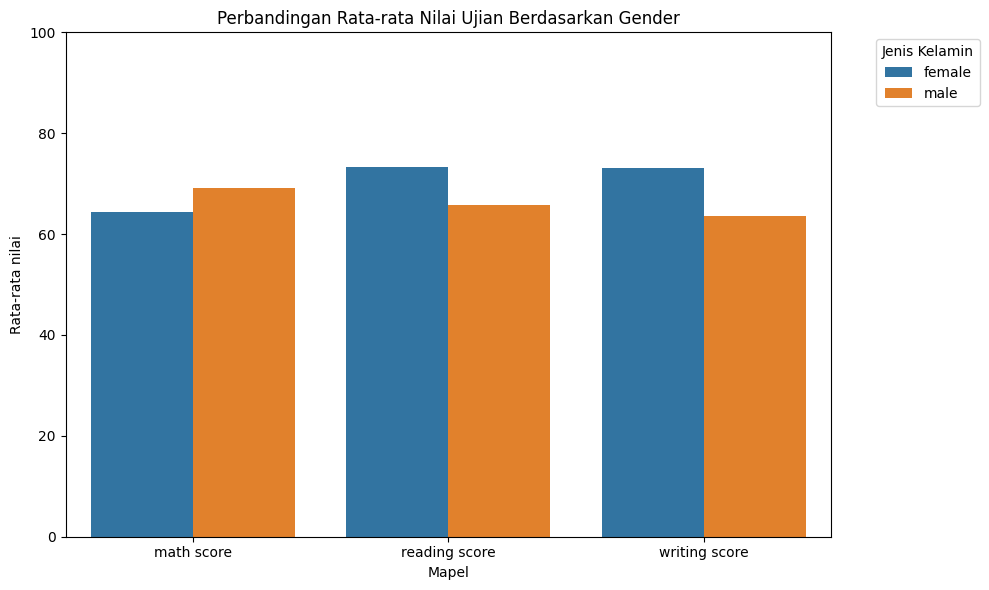

In [21]:
avg_scores = df_score.groupby('gender')[['math score', 'reading score', 'writing score']].mean().reset_index()

df_melted = avg_scores.melt(id_vars='gender', var_name='Subject', value_name='Average Score')

plt.figure(figsize=(10, 6))
sns.barplot(data=df_melted, x='Subject', y='Average Score', hue='gender')
plt.title('Perbandingan Rata-rata Nilai Ujian Berdasarkan Gender')
plt.ylabel('Rata-rata nilai')
plt.xlabel('Mapel')
plt.legend(title='Jenis Kelamin', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylim(0, 100)
plt.tight_layout()
plt.show()

In [22]:
print("Rata-rata Nilai Ujian Berdasarkan Latar Belakang Pendidikan Orang Tua:")
print(avg_scores)

Rata-rata Nilai Ujian Berdasarkan Latar Belakang Pendidikan Orang Tua:
   gender  math score  reading score  writing score
0  female   64.356863      73.231373      73.158824
1    male   69.046025      65.809623      63.667364


In [23]:
male_math_scores = df_score[df_score['gender'] == 'male']['math score']
female_math_scores = df_score[df_score['gender'] == 'female']['math score']
t_math, p_math = stats.ttest_ind(male_math_scores, female_math_scores)

male_reading_scores = df_score[df_score['gender'] == 'male']['reading score']
female_reading_scores = df_score[df_score['gender'] == 'female']['reading score']
t_reading, p_reading = stats.ttest_ind(male_reading_scores, female_reading_scores)

male_writing_scores = df_score[df_score['gender'] == 'male']['writing score']
female_writing_scores = df_score[df_score['gender'] == 'female']['writing score']
t_writing, p_writing = stats.ttest_ind(male_writing_scores, female_writing_scores)

print("Uji t untuk skor Matematika:")
print("t-value =", round(t_math, 3))
print(f"p-value = {p_math:.2e}")
print()

print("Uji t untuk skor Membaca:")
print("t-value =", round(t_reading, 3))
print(f"p-value = {p_reading:.2e}")
print()

print("Uji t untuk skor Menulis:")
print("t-value =", round(t_writing, 3))
print(f"p-value = {p_writing:.2e}")

Uji t untuk skor Matematika:
t-value = 5.178
p-value = 2.72e-07

Uji t untuk skor Membaca:
t-value = -8.621
p-value = 2.62e-17

Uji t untuk skor Menulis:
t-value = -10.855
p-value = 5.23e-26


| Ujian | t-value | p-value  | Kesimpulan                                                                 |
|----------------|---------|----------|-----------------------------------------------------------------------------|
| Matematika     | 5.178   | 2.72e-07 | Terdapat perbedaan signifikan. Siswa laki-laki cenderung lebih tinggi.     |
| Membaca        | -8.621  | 2.62e-17 | Terdapat perbedaan signifikan. Siswa perempuan cenderung lebih tinggi.     |
| Menulis        | -10.855 | 5.23e-26 | Terdapat perbedaan signifikan. Siswa perempuan cenderung lebih tinggi.     |

&nbsp;

**Kesimpulan** berdasarkan hasil **ANOVA** (*Analysis Of Variance*):
* p-value < 0.05 menunjukkan perbedaan signifikan antara dua kelompok gender.
* t-value positif berarti laki-laki > perempuan, sedangkan negatif berarti perempuan > laki-laki.
* hal ini menunjukkan adanya kecenderungan gender mempengaruhi keunggulan pada bidang akademik tertentu.

2. Apakah latar belakang orang tua berhubungan langsung dengan performa akademik siswa?

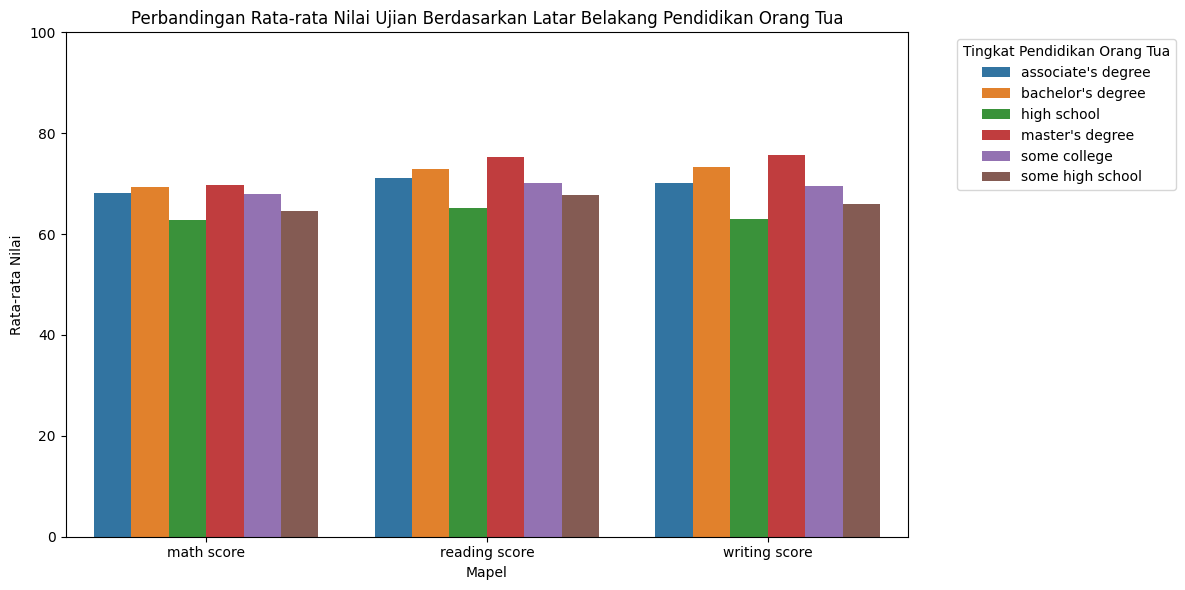

In [24]:
avg_scores = df_score.groupby('parental level of education')[['math score', 'reading score', 'writing score']].mean().reset_index()

df_melted = avg_scores.melt(id_vars='parental level of education', var_name='Subject', value_name='Average Score')

plt.figure(figsize=(12, 6))
sns.barplot(data=df_melted, x='Subject', y='Average Score', hue='parental level of education')
plt.title('Perbandingan Rata-rata Nilai Ujian Berdasarkan Latar Belakang Pendidikan Orang Tua')
plt.ylabel('Rata-rata Nilai')
plt.xlabel('Mapel')
plt.legend(title='Tingkat Pendidikan Orang Tua', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylim(0, 100)
plt.tight_layout()
plt.show()

In [25]:
print("Rata-rata Nilai Ujian Berdasarkan Latar Belakang Pendidikan Orang Tua:")
print(avg_scores)

Rata-rata Nilai Ujian Berdasarkan Latar Belakang Pendidikan Orang Tua:
  parental level of education  math score  reading score  writing score
0          associate's degree   68.072398      71.108597      70.040724
1           bachelor's degree   69.389831      73.000000      73.381356
2                 high school   62.787565      65.233161      63.036269
3             master's degree   69.745763      75.372881      75.677966
4                some college   67.869369      70.135135      69.581081
5            some high school   64.537143      67.822857      65.874286


| Latar Belakang Pendidikan Orang Tua | Rata-rata Nilai Matematika | Rata-rata Nilai Membaca | Rata-rata Nilai Menulis |
|-------------------------------------|---------------------------|-------------------------|-------------------------|
| Some High School                    | 64.54                     | 67.82                   | 65.87                   |
| High School                          | 62.79                     | 65.23                   | 63.04                   |
| Associate's Degree                   | 68.07                     | 71.11                   | 70.04                   |
| Some College                         | 67.87                     | 70.14                   | 69.58                   |
| Bachelor's Degree                    | 69.39                     | 73.00                   | 73.38                   |
| Master's Degree                      | 69.75                     | 75.37                   | 75.68                   |

&nbsp;

**Kesimpulan**:
- **Tingkat Pendidikan yang Mempengaruhi Nilai Ujian**:
   - Berdasarkan rata-rata nilai ujian untuk matematika, membaca, dan menulis, **tingkat pendidikan orang tua** berpengaruh terhadap performa akademik siswa.
   
- **Tingkat Pendidikan yang Terendah**:
   - **Some High School** memiliki rata-rata nilai ujian yang paling rendah pada semua mata pelajaran.

- **Tingkat Pendidikan yang Tertinggi**:
   - **Master's Degree** menunjukkan rata-rata nilai tertinggi pada semua mata pelajaran (matematika, membaca, dan menulis).

- **Tren Umum**:
   - Semakin tinggi tingkat pendidikan orang tua, rata-rata nilai siswa juga semakin tinggi, baik dalam matematika, membaca, maupun menulis.

- **Implikasi**:
   - Perbaikan dalam dukungan pendidikan orang tua, terutama pada tingkat pendidikan yang lebih rendah, dapat membantu meningkatkan performa akademik siswa.

# **4. Data Preparation**


Penerapan encoder pada fitur **kategorikal**.

In [26]:
df_score_enc = df_score.copy()

education_categories = [
    'some high school',
    'high school',
    'associate\'s degree',
    'some college',
    'bachelor\'s degree',
    'master\'s degree'
]

oe = OrdinalEncoder(categories=[education_categories])
df_score_enc['parental level of education'] = oe.fit_transform(df_score_enc[['parental level of education']])

df_score_enc = pd.get_dummies(df_score_enc, columns=[
    'gender',
    'race/ethnicity',
    'lunch',
    'test preparation course'
])

**Ordinal Encoding** diterapkan pada kolom `parental level of education` karena memiliki sifat ordinal, di mana tingkat pendidikan dapat diasumsikan memiliki urutan tertentu. Sementara itu, kolom-kolom seperti `gender`, `race/ethnicity`, `lunch`, dan `test preparation course` dikonversi menggunakan **One-Hot Encoding** karena bersifat nominal atau tidak memiliki urutan. Hasil encoding ini memungkinkan seluruh fitur kategorikal diubah ke dalam format numerik yang sesuai untuk proses modeling.

In [27]:
df_score_enc.head()

,parental level of education,math score,reading score,writing score,gender_female,gender_male,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,lunch_free/reduced,lunch_standard,test preparation course_completed,test preparation course_none
0,4.0,72,72,74,True,False,False,True,False,False,False,False,True,False,True
1,3.0,69,90,88,True,False,False,False,True,False,False,False,True,True,False
2,5.0,90,95,93,True,False,False,True,False,False,False,False,True,False,True
3,2.0,47,57,44,False,True,True,False,False,False,False,True,False,False,True
4,3.0,76,78,75,False,True,False,False,True,False,False,False,True,False,True


Variabel `reading_cat` merupakan hasil kategorisasi dari nilai `reading score` pada dataset. Nilai ini diklasifikasikan ke dalam tiga kategori berdasarkan rentang skor sebagai berikut:
* Low: **Nilai `0 ≤ score ≤ 60`**
* Medium: **Nilai `60 < score ≤ 80`**
* High: **Nilai `80 < score ≤ 100`**

In [28]:
df_score_enc['reading_cat'] = pd.cut(
    df_score_enc['reading score'],
    bins=[0, 60, 80, 100],
    labels=['Low', 'Medium', 'High']
)


le = LabelEncoder()
df_score_enc['reading_cat'] = le.fit_transform(df_score_enc['reading_cat'])

**Data Splitting** bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [29]:
X = df_score_enc.drop('reading score', axis=1)
y = df_score_enc['reading_cat']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42,
)

print("Ukuran x_train: ", X_train.shape)
print("Ukuran x_test: ", X_test.shape)

print("Ukuran y_train: ", y_train.shape)
print("Ukuran y_test: ", y_test.shape)

Ukuran x_train:  (790, 15)
Ukuran x_test:  (198, 15)
Ukuran y_train:  (790,)
Ukuran y_test:  (198,)


# **5. Model Development**

Penggunaan library **lazypredict** untuk insight dalam pemilihan model machine learning.

In [30]:
!pip install lazypredict --quiet

In [ ]:
from lazypredict.Supervised import LazyClassifier

clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

Daftar model **`Machine Learning`** yang ada pada **lazypredict**.

In [32]:
print(models.index)

Index(['AdaBoostClassifier', 'BaggingClassifier', 'BernoulliNB',
       'CalibratedClassifierCV', 'DecisionTreeClassifier',
       'ExtraTreeClassifier', 'ExtraTreesClassifier', 'KNeighborsClassifier',
       'GaussianNB', 'LabelPropagation', 'LabelSpreading', 'SGDClassifier',
       'LinearDiscriminantAnalysis', 'LinearSVC', 'LogisticRegression',
       'PassiveAggressiveClassifier', 'RidgeClassifier',
       'RandomForestClassifier', 'QuadraticDiscriminantAnalysis',
       'LGBMClassifier', 'SVC', 'XGBClassifier', 'RidgeClassifierCV', 'NuSVC',
       'Perceptron', 'NearestCentroid', 'DummyClassifier'],
      dtype='object', name='Model')


In [33]:
print(models)

                               Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                          
AdaBoostClassifier                 1.00               1.00    None      1.00   
BaggingClassifier                  1.00               1.00    None      1.00   
BernoulliNB                        1.00               1.00    None      1.00   
CalibratedClassifierCV             1.00               1.00    None      1.00   
DecisionTreeClassifier             1.00               1.00    None      1.00   
ExtraTreeClassifier                1.00               1.00    None      1.00   
ExtraTreesClassifier               1.00               1.00    None      1.00   
KNeighborsClassifier               1.00               1.00    None      1.00   
GaussianNB                         1.00               1.00    None      1.00   
LabelPropagation                   1.00               1.00    None      1.00   
LabelSpreading                     1.00 

Visualiasi prforma tiap model **`Machine Learning`**

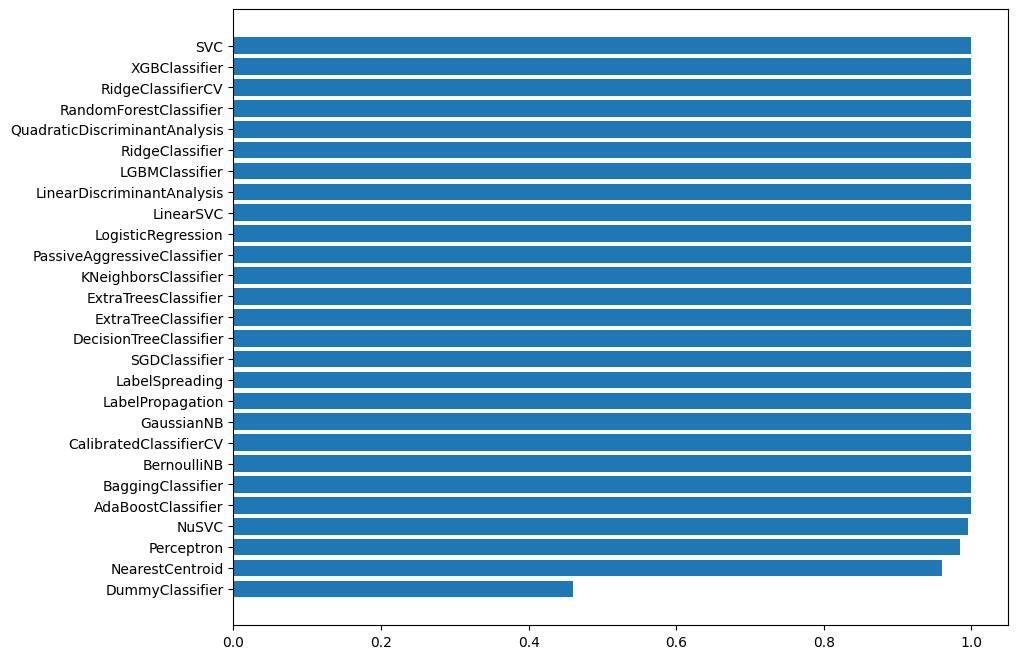

In [34]:
tp = models.sort_values(by="Accuracy",ascending=True)
plt.figure(figsize=(10, 8))
plt.barh(tp.index,tp["Accuracy"])
plt.show()

In [35]:
models = pd.DataFrame(index=['accuracy_score'],
                      columns=['XGBClassifier' ,'Naive Bayes', 'RandomForest', 'SVM'])

**_Extreme Gradient Boosting_ (XGB)**: Algoritma gradient boosting yang efisien dan sangat populer. menggunakan pendekatan ensemble untuk meningkatkan akurasi model dan sangat baik dalam menangani data dengan banyak fitur.

In [36]:
xgb = XGBClassifier(max_depth = 3, n_estimators = 200, random_state = 42, learning_rate = 0.01, n_jobs = -1)
xgb.fit(X_train, y_train)

xgb_pred = xgb.predict(X_test)

accuracy = accuracy_score(y_test, xgb_pred)

print(f'Akurasi model XGBoost: {accuracy * 100:.2f}%')

Akurasi model XGBoost: 100.00%


In [37]:
models.loc['accuracy_score', 'XGB'] = accuracy_score(y_test, xgb_pred)

**_Naive Bayes_ (NB)**: Model probabilistik yang menggunakan teorema Bayes, yang bekerja dengan asumsi independensi antar fitur.

In [38]:
nb = BernoulliNB()
nb.fit(X_train, y_train)

nb_pred = nb.predict(X_test)
accuracy = accuracy_score(y_test, nb_pred)
print(f'Akurasi model BernoulliNB: {accuracy * 100:.2f}%')

Akurasi model BernoulliNB: 71.21%


In [39]:
models.loc['accuracy_score','Naive Bayes'] = accuracy_score(y_test, nb_pred)

**_Random Forest_ (RF)**: Sebuah metode ensemble yang menggunakan banyak pohon keputusan untuk menghasilkan prediksi yang lebih akurat.

In [40]:
rf = RandomForestClassifier(n_estimators = 200, criterion = "entropy", max_depth = 10, random_state = 42)
rf.fit(X_train, y_train)

rf_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, rf_pred)
print(f'Akurasi model Random Forest: {accuracy * 100:.2f}%')

Akurasi model Random Forest: 100.00%


In [41]:
models.loc['accuracy_score','RandomForest'] = accuracy_score(y_test, rf_pred)

**_Support Vector Machine_** (SVM): Algoritma yang mencari hyperplane untuk memisahkan kelas data secara optimal.

In [42]:
svm = SVC(kernel = 'rbf', gamma = 'auto', random_state = 42)
svm.fit(X_train, y_train)

svm_pred = svm.predict(X_test)
accuracy = accuracy_score(y_test, svm_pred)
print(f'Akurasi model Support Vector Machine: {accuracy * 100:.2f}%')

Akurasi model Support Vector Machine: 94.44%


In [43]:
models.loc['accuracy_score','SVM'] = accuracy_score(y_test, svm_pred)

# **6. Model Evaluation**

Memuat label target pada variabel `reading_cat`.

In [44]:
tgt = ['Low',
       'Medium',
       'High']

Memuat prediksi tiap model **`Machine Learning`** yang telah dipilih.

In [45]:
ml = {
    'XGBoost' : xgb_pred,
    'Naive Bayes': nb_pred,
    'Random Forest': rf_pred,
    'SVM': svm_pred,
}

In [51]:
for i, (model_name, y_pred) in enumerate(ml.items()):
  print("\nModel "+model_name+":\n", classification_report(y_test, y_pred, target_names = tgt))


Model XGBoost:
               precision    recall  f1-score   support

         Low       1.00      1.00      1.00        39
      Medium       1.00      1.00      1.00        68
        High       1.00      1.00      1.00        91

    accuracy                           1.00       198
   macro avg       1.00      1.00      1.00       198
weighted avg       1.00      1.00      1.00       198


Model Naive Bayes:
               precision    recall  f1-score   support

         Low       1.00      1.00      1.00        39
      Medium       0.63      0.40      0.49        68
        High       0.65      0.82      0.72        91

    accuracy                           0.71       198
   macro avg       0.76      0.74      0.74       198
weighted avg       0.71      0.71      0.70       198


Model Random Forest:
               precision    recall  f1-score   support

         Low       1.00      1.00      1.00        39
      Medium       1.00      1.00      1.00        68
        High  

**Confusion Matrix** adalah sebuah tabel yang digunakan untuk mengevaluasi performa model klasifikasi. Tabel ini menunjukkan jumlah prediksi yang benar dan salah yang dilakukan oleh model dibandingkan dengan nilai aktual.

&nbsp;

* True Positive (TP): Model memprediksi positif, dan sebenarnya memang positif.
* True Negative (TN): Model memprediksi negatif, dan sebenarnya memang negatif.
* False Positive (FP): Model memprediksi positif, tapi sebenarnya negatif (juga disebut Type I Error).
* False Negative (FN): Model memprediksi negatif, tapi sebenarnya positif (juga disebut Type II Error).



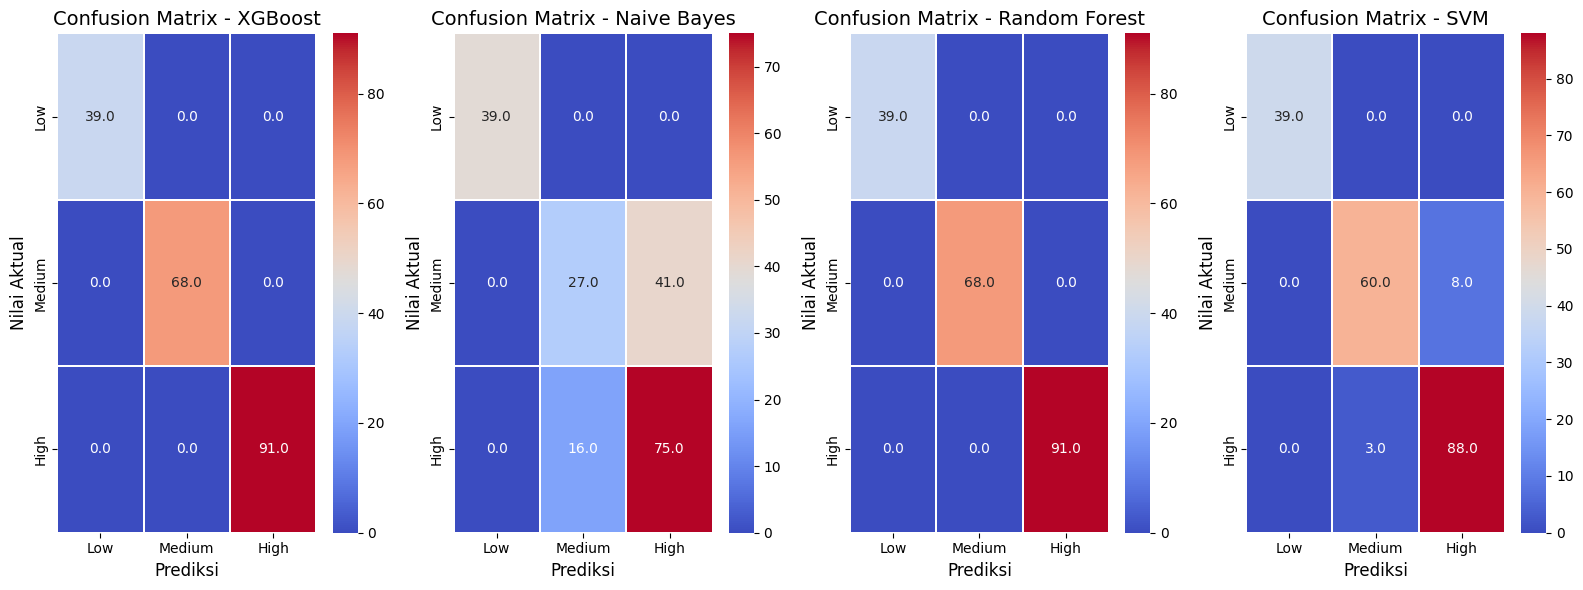

In [48]:
plt.figure(figsize=(16,6))

for i, (model_name, y_pred) in enumerate(ml.items()):
    cm = confusion_matrix(y_test, y_pred)
    plt.subplot(1, len(ml), i + 1)
    sns.heatmap(
        cm,
        annot=True,
        fmt=".1f",
        cmap="coolwarm",
        linewidths=0.2,
        xticklabels=tgt,
        yticklabels=tgt,
        cbar = True
    )
    plt.title(f"Confusion Matrix - {model_name}", fontsize=14)
    plt.xlabel("Prediksi", fontsize=12)
    plt.ylabel("Nilai Aktual", fontsize=12)

plt.tight_layout()
plt.show()

**XGBoost**

| Class  | TP  | TN  | FP | FN |
|:------:|:---:|:---:|:--:|:--:|
| Low    | 39  | 159 |  0 |  0 |
| Medium | 68  | 130 |  0 |  0 |
| High   | 91  | 107 |  0 |  0 |

&nbsp;

**Naive Bayes**

| Class  | TP  | TN  | FP | FN |
|:------:|:---:|:---:|:--:|:--:|
| Low    | 39  | 159 |  0 |  0 |
| Medium | 27  | 114 | 16 | 41 |
| High   | 75  |  66 | 41 | 16 |

&nbsp;

**Random Forest**

| Class  | TP  | TN  | FP | FN |
|:------:|:---:|:---:|:--:|:--:|
| Low    | 39  | 159 |  0 |  0 |
| Medium | 68  | 130 |  0 |  0 |
| High   | 91  | 107 |  0 |  0 |

&nbsp;

**SVM**

| Class  | TP  | TN  | FP | FN |
|:------:|:---:|:---:|:--:|:--:|
| Low    | 39  | 159 |  0 |  0 |
| Medium | 60  | 123 |  3 |  8 |
| High   | 88  |  99 |  8 |  3 |

&nbsp;

Kesimpulan:
- **XGBoost** dan **Random Forest**: performa sempurna.
- **SVM**: performa cukup baik, ada sedikit kesalahan.
- **Naive Bayes**: paling banyak error dalam memprediksi kelas Medium dan High.


Visualisasi **Score / Akurasi** tiap model.

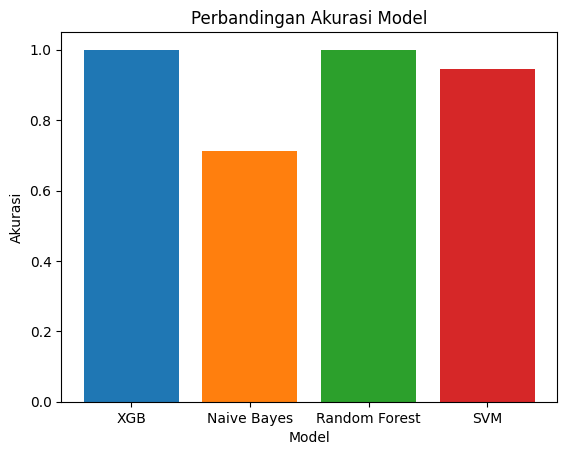

In [49]:
plt.bar('XGB', models['XGB'])
plt.bar('Naive Bayes', models['Naive Bayes'])
plt.bar('Random Forest', models['RandomForest'])
plt.bar('SVM', models['SVM'])

plt.title("Perbandingan Akurasi Model")
plt.xlabel('Model')
plt.ylabel('Akurasi')
plt.show()